# D. Journic Phase 2 Project, Rev 1

This notebook is to have the revisions to my Phase 2 Project after the initial evaluation. This will be a trimmed down notebook, containing some of the original notebooks, along with the corrections.

### Step 1: Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
# Setting random seed for reproducibility
np.random.seed(1000)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from itertools import combinations
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm
import eli5

#### Step 1a: Read the data

In [2]:
df=pd.read_csv("kc_house_data.csv")

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


I know the variables I want to use. But this time, I think I'll keep the zip code, for future changes.

In [5]:
col_ign=['id','date','view','sqft_above','sqft_basement','yr_renovated','lat','long','sqft_living15','sqft_lot15','floors','waterfront','condition','grade','yr_built']

In [6]:
df_s1=df.drop(columns=col_ign,axis=1) #The first cut of the data

Originally, here's where I did the first train/test split, instead I'm going to put it in the linear regression function. So here is where I look at the data in a pairplot.

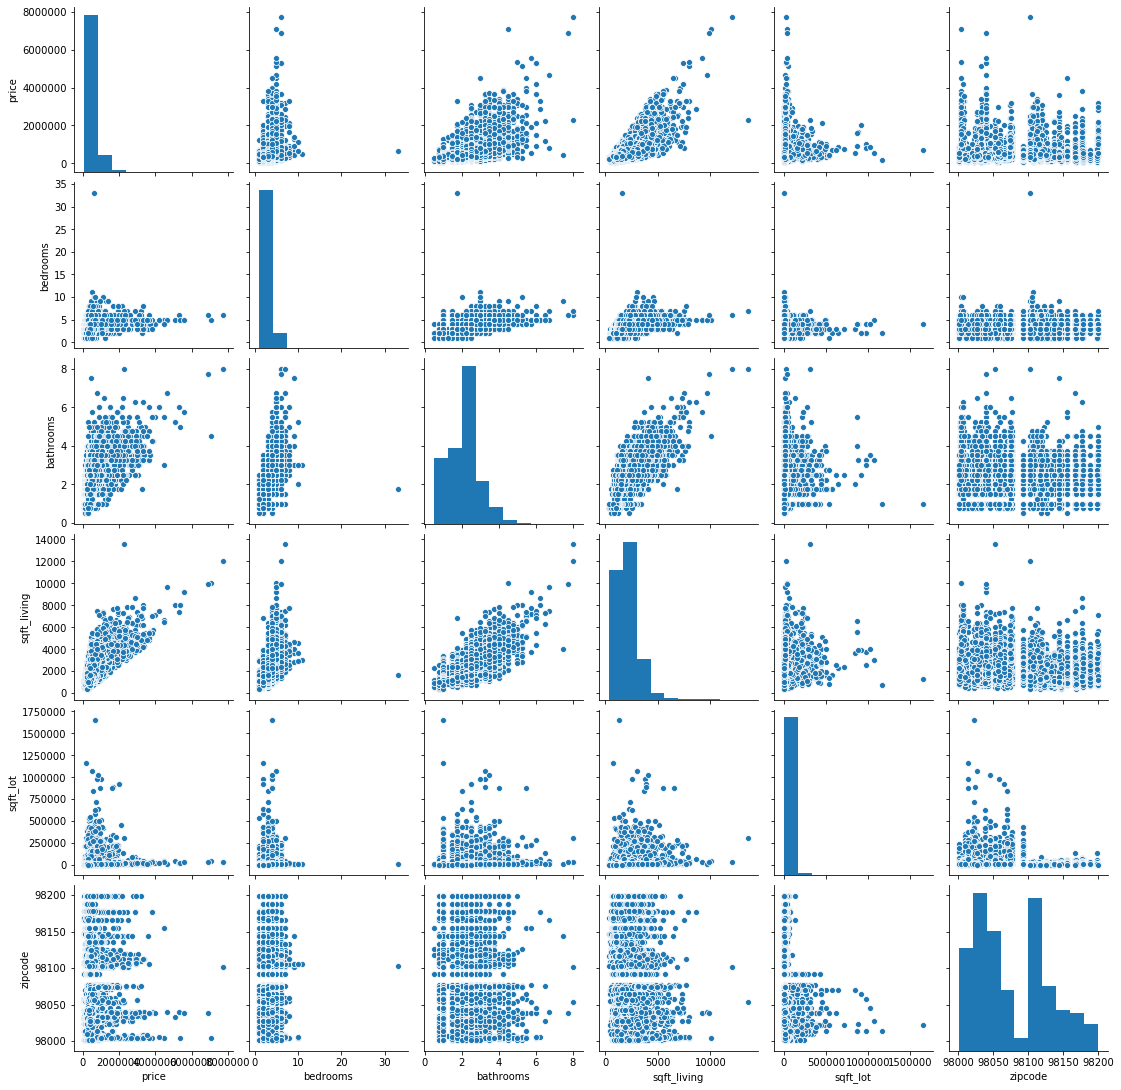

In [7]:
sns.pairplot(df_s1)

Then I created a little heatmap to help show the correlation:

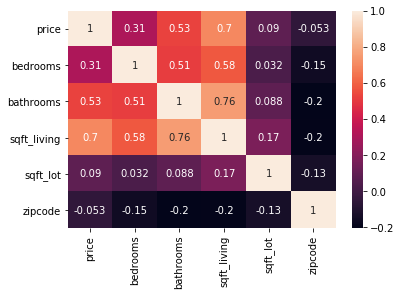

In [8]:
ax = sns.heatmap(df_s1.corr(), annot=True)

ax.set_ylim(6,0)
plt.show()

There is the obvious outlier in the bedrooms, so I can cut that out.

In [9]:
df_s2 = df_s1[df_s1.bedrooms != 33] #Second cut of data

So here is where I needed to make changes. I introduced the train/test split into my linear regression function.

In [10]:
df_s2a=df_s2.drop(columns='price') #Dropping my target variable from the dataframe

In [11]:
price=df_s2['price']

In [12]:
def lreg (elements,target):
    """This function is designed to take in 2 dataframes: the elements and the target. It will then perform a linear
    regression of the variables, and print out the values of the slope (m), intercept (b), as well as the R2 score. It will also
    return those three variables.
    It will also perform a train/test split on the data, scale and then provide R2 scores.
    """
    lr=LinearRegression()
    X=elements.values
    y=target.values
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    lr.fit(X_train_scaled,y_train)
    y_train_pred = lr.predict(X_train_scaled)
    y_test_pred = lr.predict(X_test_scaled)
     
    print("Training Scores:")
    print(f"R2: {r2_score(y_train, y_train_pred)}")
    print("Testing Scores:")
    print(f"R2: {r2_score(y_test, y_test_pred)}")
    m = lr.coef_
    print('Slope: {}'.format(m))
    b = lr.intercept_
    print('Intercept: {}'.format(b))
    r2 = r2_score(y_test, y_test_pred) 
        
    return m,b,r2

So, just to test the function's functionality:

In [13]:
lreg(df_s2a[['sqft_living']],df_s2['price'])

Training Scores:
R2: 0.4927660295248324
Testing Scores:
R2: 0.49251276727464477
Slope: [258583.79288285]
Intercept: 540443.3199975304


(array([258583.79288285]), 540443.3199975304, 0.49251276727464477)

Ok, so the first time through this, I got an R2 of -2.54, so I went back up to it and made some more changes. I finally managed to get an R2 value of .49, which is close to what I was getting before. So here is where I start trying with different data combinations.

In [14]:
att1=['sqft_living','sqft_lot','bedrooms','bathrooms']

In [15]:
lreg(df_s2a[att1],price)

Training Scores:
R2: 0.5113237277729574
Testing Scores:
R2: 0.5058950367297197
Slope: [296889.47455057 -19542.62189265 -61241.80960343   6074.19763475]
Intercept: 541448.5726986479


(array([296889.47455057, -19542.62189265, -61241.80960343,   6074.19763475]),
 541448.5726986479,
 0.5058950367297197)

So this does give me simliar data to the first run of the program.

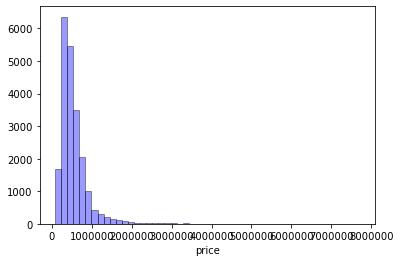

In [16]:
sns.distplot(price, hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [17]:
price_log=np.log(price) #Log transform of the price

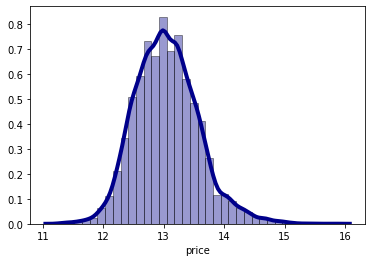

In [18]:
sns.distplot(price_log, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Here is where I figure out the limits I'm going to use for the price data. I'm going to use 2 standard deviations above the mean as the upper limit.

In [19]:
price_log.describe()

count    21596.000000
mean        13.048196
std          0.526562
min         11.264464
25%         12.682307
50%         13.017003
75%         13.377006
max         15.856731
Name: price, dtype: float64

In [20]:
stdv=0.526562
cutoff=price_log.mean() + (stdv*2)
price_top=np.exp(cutoff)
print(price_top)

1330838.9322642826


In [21]:
df_s3=df_s2[df_s2.price<=1336364] #Third cut of data

In [22]:
price=df_s3['price'] #Updating target variable
df_s3a=df_s3.drop(columns='price')

So, let's try the linear regression function with the third cut of data

In [23]:
lreg(df_s3a[att1],price)

Training Scores:
R2: 0.4252021215787616
Testing Scores:
R2: 0.4224100426968639
Slope: [162218.86149959  -6100.90066156 -29008.17492804   7689.73266928]
Intercept: 492055.42553191487


(array([162218.86149959,  -6100.90066156, -29008.17492804,   7689.73266928]),
 492055.42553191487,
 0.4224100426968639)

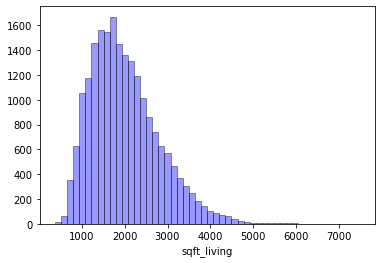

In [24]:
sns.distplot(df_s3a['sqft_living'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [25]:
living_log=np.log(df_s3a['sqft_living'])

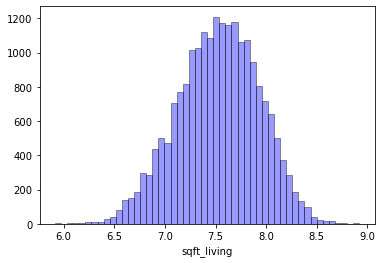

In [26]:
sns.distplot(living_log, hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

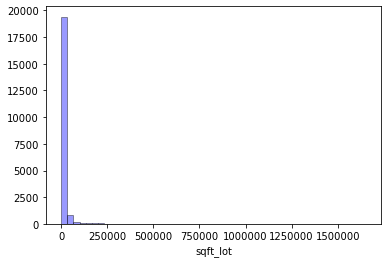

In [27]:
sns.distplot(df_s3a['sqft_lot'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [28]:
acre_log=np.log(df_s3a['sqft_lot'])

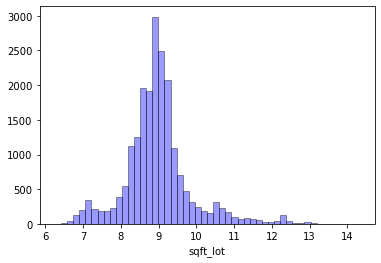

In [29]:
sns.distplot(acre_log, hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [30]:
df_s3a['sqft_living'].describe()

count    20869.000000
mean      2006.091044
std        806.488218
min        370.000000
25%       1410.000000
50%       1880.000000
75%       2475.000000
max       7480.000000
Name: sqft_living, dtype: float64

In [31]:
df_s3a['sqft_lot'].describe()

count    2.086900e+04
mean     1.468600e+04
std      3.999138e+04
min      5.200000e+02
25%      5.000000e+03
50%      7.528000e+03
75%      1.040400e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [32]:
acre_log.describe()

count    20869.000000
mean         8.969776
std          0.896203
min          6.253829
25%          8.517193
50%          8.926385
75%          9.249946
max         14.317109
Name: sqft_lot, dtype: float64

This was something I brought up in my 'future considerations', putting an upper cap on the lot area

In [33]:
lot_sdev= 0.896203
cutoff_lot=acre_log.mean() + (lot_sdev*2)
lot_top=np.exp(cutoff_lot)
print(lot_top)

47201.53443503135


So this is the upper limit for sqft_lot, I'm not sure if I want to use it, but it's here.

In [34]:
df_s3a['sqft_lot_cap']=df_s3a['sqft_lot']

In [35]:
df_s3a.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,zipcode,sqft_lot_cap
0,3,1.00,1180,5650,98178,5650
1,3,2.25,2570,7242,98125,7242
2,2,1.00,770,10000,98028,10000
3,4,3.00,1960,5000,98136,5000
4,3,2.00,1680,8080,98074,8080


In [36]:
df_s3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,zipcode
0,221900.0,3,1.00,1180,5650,98178
1,538000.0,3,2.25,2570,7242,98125
2,180000.0,2,1.00,770,10000,98028
3,604000.0,4,3.00,1960,5000,98136
4,510000.0,3,2.00,1680,8080,98074


In [37]:
df_s3['sqft_lot_cap']=df_s3['sqft_lot']

D:\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_s4=df_s3[df_s3.sqft_lot_cap<=47201.5344]

In [39]:
df_s4.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,zipcode,sqft_lot_cap
0,221900.0,3,1.00,1180,5650,98178,5650
1,538000.0,3,2.25,2570,7242,98125,7242
2,180000.0,2,1.00,770,10000,98028,10000
3,604000.0,4,3.00,1960,5000,98136,5000
4,510000.0,3,2.00,1680,8080,98074,8080


In [40]:
df_s4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19971 entries, 0 to 21596
Data columns (total 7 columns):
price           19971 non-null float64
bedrooms        19971 non-null int64
bathrooms       19971 non-null float64
sqft_living     19971 non-null int64
sqft_lot        19971 non-null int64
zipcode         19971 non-null int64
sqft_lot_cap    19971 non-null int64
dtypes: float64(2), int64(5)
memory usage: 1.2 MB


In [41]:
price=df_s4['price'] #Updating target variable
df_s4a=df_s4.drop(columns='price')

In [42]:
df_s4a.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,zipcode,sqft_lot_cap
0,3,1.00,1180,5650,98178,5650
1,3,2.25,2570,7242,98125,7242
2,2,1.00,770,10000,98028,10000
3,4,3.00,1960,5000,98136,5000
4,3,2.00,1680,8080,98074,8080


In [43]:
df_s4a['sqft_lot_cap'].describe()

count    19971.000000
mean      8861.691953
std       7144.404522
min        520.000000
25%       5000.000000
50%       7350.000000
75%       9898.500000
max      47179.000000
Name: sqft_lot_cap, dtype: float64

In [44]:
att2=['sqft_lot_cap','sqft_living','bedrooms','bathrooms']

In [45]:
lreg(df_s4a[att2],price)

Training Scores:
R2: 0.4185906988102046
Testing Scores:
R2: 0.42196226383730073
Slope: [-17302.42667779 167814.7512755  -30378.51058879   2369.05453172]
Intercept: 487641.26011483517


(array([-17302.42667779, 167814.7512755 , -30378.51058879,   2369.05453172]),
 487641.26011483517,
 0.42196226383730073)

In [46]:
lreg(df_s4a[att1],price)

Training Scores:
R2: 0.4172301393007969
Testing Scores:
R2: 0.4259552876096456
Slope: [166550.20083677 -17374.59855282 -27707.89194786   1724.5589506 ]
Intercept: 486902.5964748297


(array([166550.20083677, -17374.59855282, -27707.89194786,   1724.5589506 ]),
 486902.5964748297,
 0.4259552876096456)

So that change did almost nothing, but that's not too surprising. Since I already know the biggest influencer on price is living area.

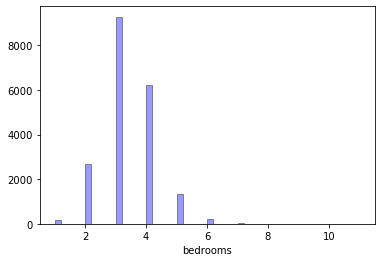

In [47]:
sns.distplot(df_s4a['bedrooms'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

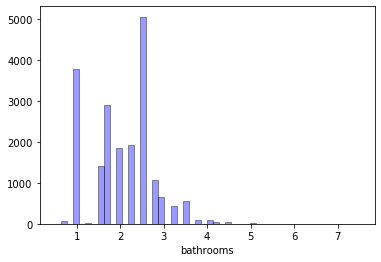

In [48]:
sns.distplot(df_s4a['bathrooms'], hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [49]:
liv_log=np.log(df_s4a['sqft_living'])

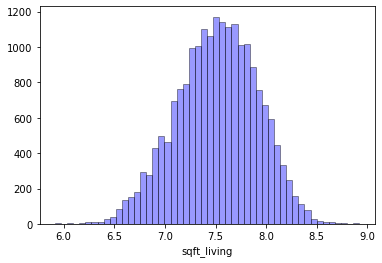

In [50]:
sns.distplot(liv_log, hist=True, kde=False, 
             bins=int(50), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [51]:
liv_log.describe()

count    19971.000000
mean         7.512109
std          0.399006
min          5.913503
25%          7.244228
50%          7.522941
75%          7.799753
max          8.919988
Name: sqft_living, dtype: float64

In [52]:
liv_sdev= 0.399006
cutoff_liv=liv_log.mean() + (liv_sdev*2)
liv_top=np.exp(cutoff_liv)
print(liv_top)

4064.8050610884347


In [53]:
df_s4['sqft_liv_cap']=df_s4['sqft_living']

D:\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
df_s5=df_s4[df_s4.sqft_liv_cap<=4064.805]

In [55]:
df_s5.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,zipcode,sqft_lot_cap,sqft_liv_cap
0,221900.0,3,1.00,1180,5650,98178,5650,1180
1,538000.0,3,2.25,2570,7242,98125,7242,2570
2,180000.0,2,1.00,770,10000,98028,10000,770
3,604000.0,4,3.00,1960,5000,98136,5000,1960
4,510000.0,3,2.00,1680,8080,98074,8080,1680


In [56]:
df_s5['sqft_liv_cap'].describe()

count    19697.000000
mean      1941.561913
std        723.507840
min        370.000000
25%       1390.000000
50%       1840.000000
75%       2410.000000
max       4060.000000
Name: sqft_liv_cap, dtype: float64

In [57]:
att3=['sqft_liv_cap','sqft_lot_cap','bedrooms','bathrooms']

In [58]:
price=df_s5['price'] #Updating target variable
df_s5a=df_s5.drop(columns='price')

In [59]:
lreg(df_s5a[att3],price)

Training Scores:
R2: 0.3899637140263539
Testing Scores:
R2: 0.38664340183747203
Slope: [157888.04549327 -17011.79915397 -29517.78226218    960.85520732]
Intercept: 480391.68081505544


(array([157888.04549327, -17011.79915397, -29517.78226218,    960.85520732]),
 480391.68081505544,
 0.38664340183747203)

Ok, so again, what I'm doing seems to be moving things in the wrong direction.

In [60]:
continuous = ['sqft_living', 'sqft_lot','price']
cont = df_s5[continuous]
log_names = [f'{column}_log' for column in cont.columns]
df_log = np.log(cont)
df_log.columns = log_names

In [61]:
scaler = StandardScaler()
df_log_norm = scaler.fit_transform(df_log)

In [62]:
df_log_norm = pd.DataFrame(df_log_norm, columns = df_log.columns)

In [63]:
df_s6 = pd.concat([df_log_norm, df_s5], axis=1)
df_s6.head()

,sqft_living_log,sqft_lot_log,price_log,price,bedrooms,bathrooms,sqft_living,sqft_lot,zipcode,sqft_lot_cap,sqft_liv_cap
0,-1.101972,-0.290009,-1.461747,221900.0,3.0,1.00,1180.0,5650.0,98178.0,5650.0,1180.0
1,0.910677,0.066490,0.470489,538000.0,3.0,2.25,2570.0,7242.0,98125.0,7242.0,2570.0
2,-2.205733,0.529900,-1.918324,180000.0,2.0,1.00,770.0,10000.0,98028.0,10000.0,770.0
3,0.210065,-0.465526,0.722953,604000.0,4.0,3.00,1960.0,5000.0,98136.0,5000.0,1960.0
4,-0.188515,0.223734,0.353878,510000.0,3.0,2.00,1680.0,8080.0,98074.0,8080.0,1680.0


In [64]:
df_s6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21423 entries, 0 to 21596
Data columns (total 11 columns):
sqft_living_log    19697 non-null float64
sqft_lot_log       19697 non-null float64
price_log          19697 non-null float64
price              19697 non-null float64
bedrooms           19697 non-null float64
bathrooms          19697 non-null float64
sqft_living        19697 non-null float64
sqft_lot           19697 non-null float64
zipcode            19697 non-null float64
sqft_lot_cap       19697 non-null float64
sqft_liv_cap       19697 non-null float64
dtypes: float64(11)
memory usage: 2.0 MB


In [65]:
df_s6.dropna(inplace=True)

In [66]:
p_drop=['price','price_log']

In [67]:
df_s6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17971 entries, 0 to 19696
Data columns (total 11 columns):
sqft_living_log    17971 non-null float64
sqft_lot_log       17971 non-null float64
price_log          17971 non-null float64
price              17971 non-null float64
bedrooms           17971 non-null float64
bathrooms          17971 non-null float64
sqft_living        17971 non-null float64
sqft_lot           17971 non-null float64
zipcode            17971 non-null float64
sqft_lot_cap       17971 non-null float64
sqft_liv_cap       17971 non-null float64
dtypes: float64(11)
memory usage: 1.6 MB


In [68]:
df_s6a=df_s6.drop(columns=p_drop,axis=1) #6th subset of dataframe, dropping the target variable

In [69]:
df_s6a.head()

,sqft_living_log,sqft_lot_log,bedrooms,bathrooms,sqft_living,sqft_lot,zipcode,sqft_lot_cap,sqft_liv_cap
0,-1.101972,-0.290009,3.0,1.00,1180.0,5650.0,98178.0,5650.0,1180.0
1,0.910677,0.066490,3.0,2.25,2570.0,7242.0,98125.0,7242.0,2570.0
2,-2.205733,0.529900,2.0,1.00,770.0,10000.0,98028.0,10000.0,770.0
3,0.210065,-0.465526,4.0,3.00,1960.0,5000.0,98136.0,5000.0,1960.0
4,-0.188515,0.223734,3.0,2.00,1680.0,8080.0,98074.0,8080.0,1680.0


In [70]:
att4=['sqft_living_log','sqft_lot_log']

In [71]:
lreg(df_s6a[att4],df_s6['price_log'])

Training Scores:
R2: 0.37936737914947216
Testing Scores:
R2: 0.38859138778367985
Slope: [ 0.63937083 -0.15543547]
Intercept: 0.0016298209088611568


(array([ 0.63937083, -0.15543547]), 0.0016298209088611568, 0.38859138778367985)

In [72]:
lr=LinearRegression()
X=df_s6a[att1]
y=df_s6['price']
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
eli5.show_weights(lr, feature_names=list(X.columns))

Weight?,Feature
+180352.741,<BIAS>
+223.018,sqft_living
-2.639,sqft_lot
-2173.362,bathrooms
-30983.156,bedrooms


In [74]:
df_s6.corr().price.sort_values(ascending=False)

price              1.000000
sqft_liv_cap       0.609157
sqft_living        0.609157
bathrooms          0.433743
bedrooms           0.290793
sqft_lot_cap       0.080425
sqft_lot           0.080425
zipcode            0.003984
price_log         -0.000984
sqft_lot_log      -0.009182
sqft_living_log   -0.012766
Name: price, dtype: float64

In [75]:
df_s3b=df_s3.drop(columns='sqft_lot_cap') #This is just to get a visual for the presentation
df_s3b=df_s3b.drop(columns='zipcode')

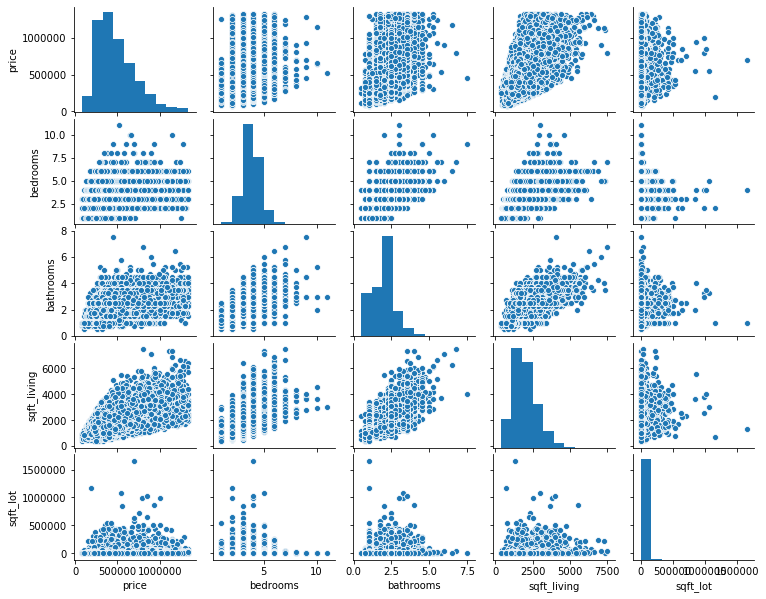

In [76]:
g=sns.pairplot(df_s3b) #This will be the visual,maybe
g.fig.set_size_inches(10,8)

In [77]:
df_s6.corr()

,sqft_living_log,sqft_lot_log,price_log,price,bedrooms,bathrooms,sqft_living,sqft_lot,zipcode,sqft_lot_cap,sqft_liv_cap
sqft_living_log,1.000000,0.272464,0.599398,-0.012766,-0.008814,-0.003372,-0.002625,0.002506,-0.006013,0.002506,-0.002625
sqft_lot_log,0.272464,1.000000,0.019152,-0.009182,-0.003917,-0.009134,-0.004333,0.006909,-0.013905,0.006909,-0.004333
price_log,0.599398,0.019152,1.000000,-0.000984,-0.004494,-0.008755,0.003695,0.010656,-0.013644,0.010656,0.003695
price,-0.012766,-0.009182,-0.000984,1.000000,0.290793,0.433743,0.609157,0.080425,0.003984,0.080425,0.609157
bedrooms,-0.008814,-0.003917,-0.004494,0.290793,1.000000,0.506689,0.601970,0.123465,-0.140169,0.123465,0.601970
bathrooms,-0.003372,-0.009134,-0.008755,0.433743,0.506689,1.000000,0.717945,0.077563,-0.203013,0.077563,0.717945
sqft_living,-0.002625,-0.004333,0.003695,0.609157,0.601970,0.717945,1.000000,0.253521,-0.175260,0.253521,1.000000
sqft_lot,0.002506,0.006909,0.010656,0.080425,0.123465,0.077563,0.253521,1.000000,-0.208665,1.000000,0.253521
zipcode,-0.006013,-0.013905,-0.013644,0.003984,-0.140169,-0.203013,-0.175260,-0.208665,1.000000,-0.208665,-0.175260
sqft_lot_cap,0.002506,0.006909,0.010656,0.080425,0.123465,0.077563,0.253521,1.000000,-0.208665,1.000000,0.253521


### Residuals, not the money kind.
So here I'm going to check some residuals plots to see how the model works.

In [78]:
X=df_s6a[att1]

In [79]:
vif = pd.DataFrame() #Creating an empty dataframe
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif["features"] = df_s6a[att1].columns

In [80]:
vif

,VIF,features
0,21.596201,sqft_living
1,2.782188,sqft_lot
2,15.185925,bedrooms
3,18.533256,bathrooms


In [81]:
y=df_s6['price']

In [82]:
lr = LinearRegression()
lr.fit(X, y)
preds = lr.predict(X)

In [83]:
residuals = y-preds

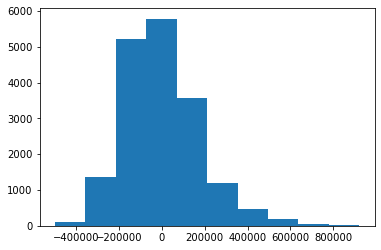

In [84]:
plt.hist(residuals)
plt.show()

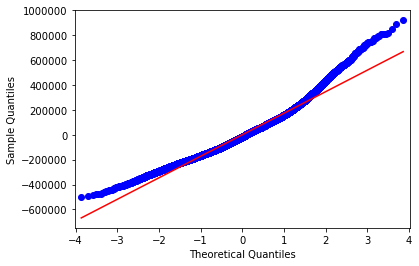

In [85]:
fig = sm.qqplot(residuals, line = 'r')

I don't know much about qq plots, but that doesn't look too hot.

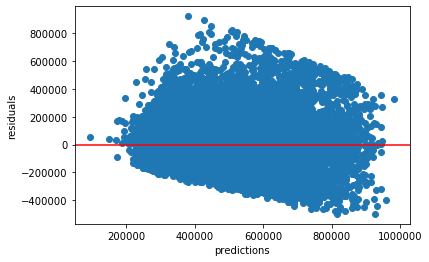

In [86]:
plt.scatter(preds, residuals)
plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.show()

In [87]:
X=df_s2a[att1]
y=df_s2['price']
lr = LinearRegression()
lr.fit(X, y)
preds = lr.predict(X)

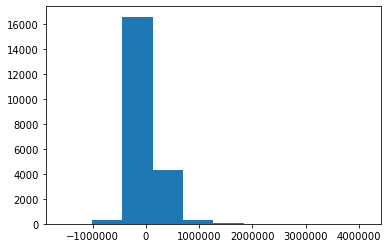

In [88]:
residuals = y-preds
plt.hist(residuals)
plt.show()

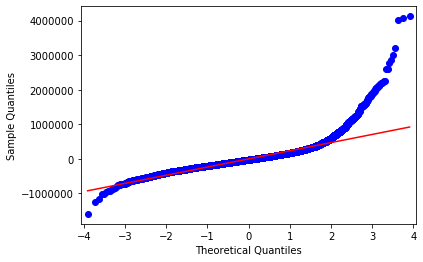

In [89]:
fig = sm.qqplot(residuals, line = 'r')

This is some obviously skewed data. But we sort of knew that the data wasn't going to fit well to begin with.

### One last time, just for "fun"
I'm going to narrow it down to 1 zipcode, the most popular one, and run the model through that, and get a qq and residuals plot, and that should just about wrap things up.

In [95]:
df_s2a['zipcode'].value_counts().idxmax()

98103

In [97]:
df_s2z=df_s2[df_s2.zipcode==98103]

In [98]:
df_s2z.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,zipcode
17,485000.0,4,1.00,1600,4300,98103
111,570000.0,3,1.75,1260,3328,98103
116,518500.0,3,3.50,1590,1102,98103
128,822500.0,5,3.50,2320,4960,98103
149,511000.0,3,1.00,1430,3455,98103


In [99]:
df_s2zip_var=df_s2z.drop(columns='price')

In [100]:
y=df_s2z.price

In [101]:
lreg(df_s2zip_var[att1],y)

Training Scores:
R2: 0.5544726602686663
Testing Scores:
R2: 0.5976829582495553
Slope: [176300.65649927  19512.6195159  -29238.89988495  -7257.21516036]
Intercept: 586433.7111111111


(array([176300.65649927,  19512.6195159 , -29238.89988495,  -7257.21516036]),
 586433.7111111111,
 0.5976829582495553)

So we got a little bump to the R2 score.

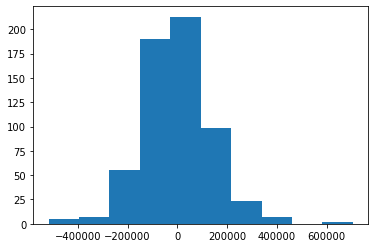

In [102]:
X=df_s2zip_var[att1]
lr = LinearRegression()
lr.fit(X, y)
preds = lr.predict(X)
residuals = y-preds
plt.hist(residuals)
plt.show()

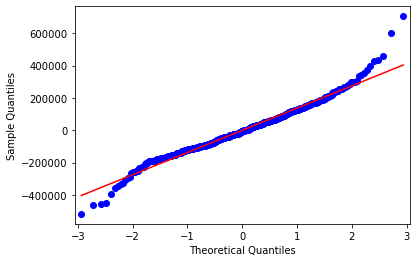

In [103]:
fig = sm.qqplot(residuals, line = 'r')

That looks better.

## In conclusion:
Hopefully I was able to demonstrate a better understanding of linear modeling, and make the improvements necessary to move on.